In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
# Import data
data = pd.read_csv('/content/drive/Othercomputers/My Laptop/Kuliah/SEMESTER 3/Pengantar Data Sains/Pengantar-Data-Sains-2023/Project MID/Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
# Mengecek informasi data sebelum di olah
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


(10000, 6)

In [6]:
# Mengecek apakah ada data yang bernilai null
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
# Melihat rincian data
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [11]:
# Mengubah elemen dalam data agar mudah di hitung
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({
    'No':0,
    'Yes':1,
})

In [12]:
# Menetapkan kolom sebagai variabel
X = data.iloc[:,0:5]
y = data.iloc[:,-1]     # kolom yang jadi target 'Performance Index'

In [13]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [14]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [42]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func = chi2, k = 3) #nilai k mengambil jumlah data teratas
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [44]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Variables', 'Performances']  #naming the dataframe columns
print(featureScores.nlargest(3, 'Performances'))  #print 3 best features

                          Variables  Performances
1                   Previous Scores  36878.998217
0                     Hours Studied   2741.620002
4  Sample Question Papers Practiced    184.462391


In [18]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.12404628 0.43760022 0.0210015  0.14508068 0.27227133]


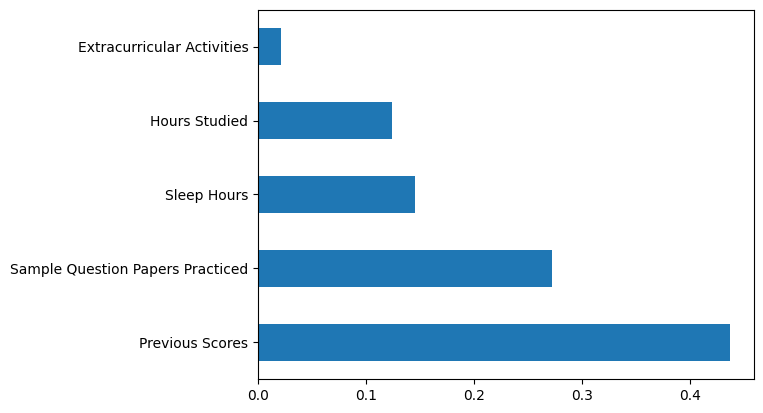

In [19]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

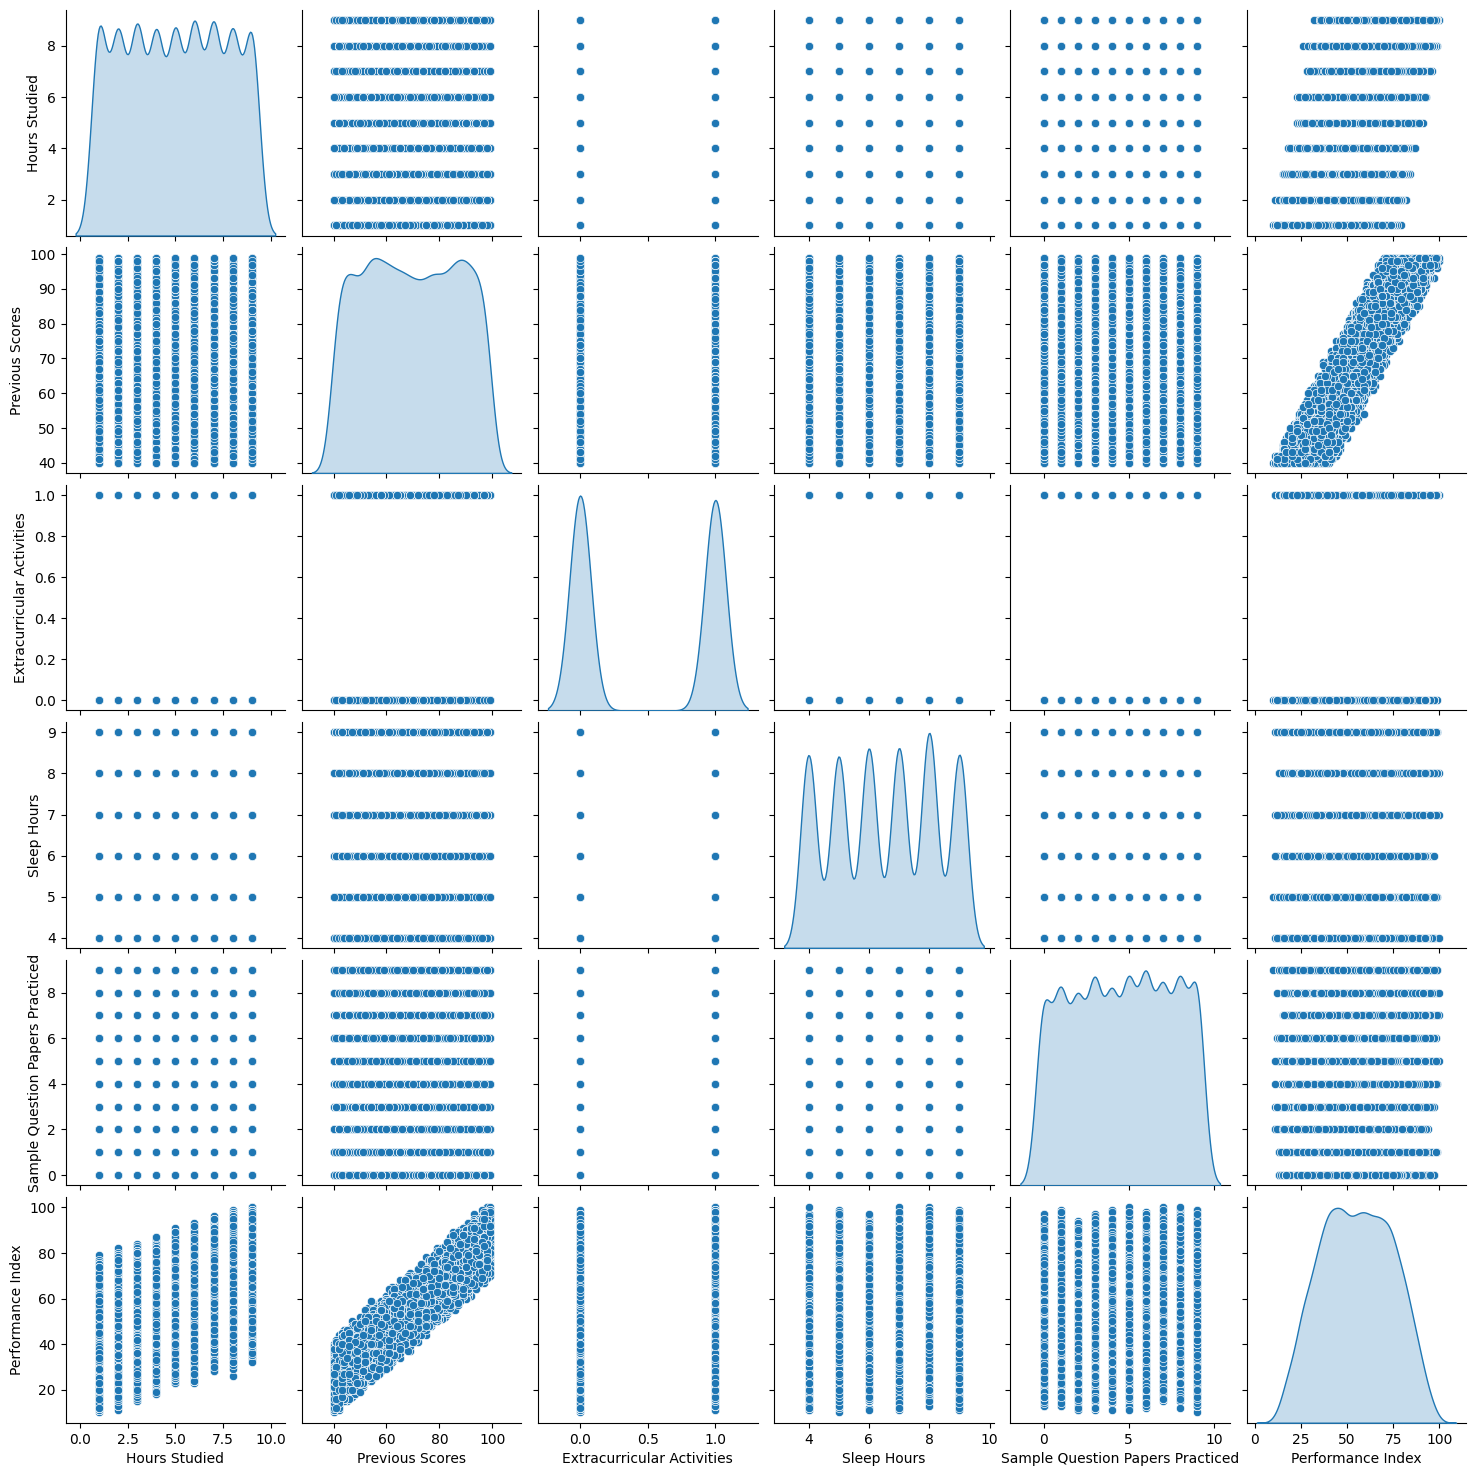

In [26]:
# gambaran grafik antar variabel
sns.pairplot(data,diag_kind = 'kde')

In [20]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr(numeric_only = True)
top_corr_features = corrmat.index

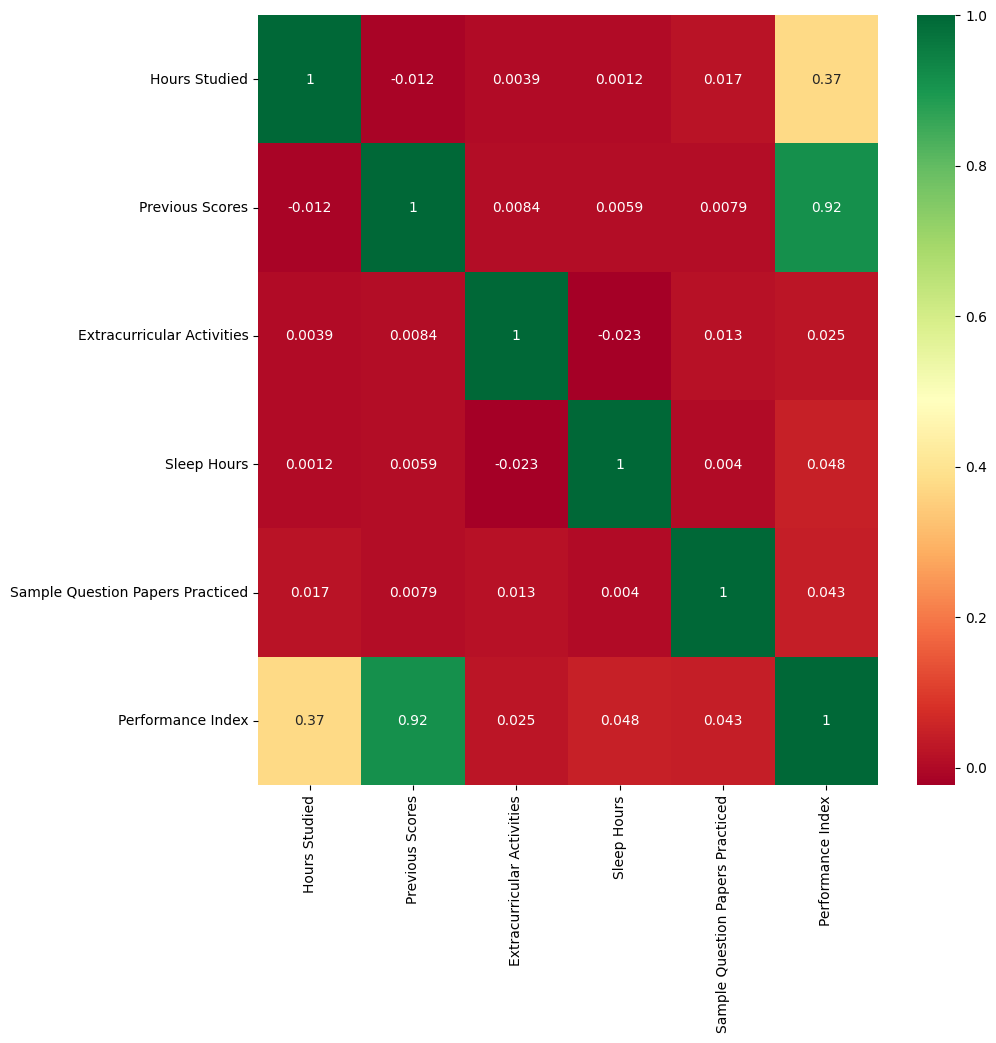

In [40]:
# plot heatmap
plt.figure(figsize = (10, 10))
g=sns.heatmap(data[top_corr_features].corr(),annot = True, cmap = "RdYlGn")

In [22]:
# menggunakan linear regression
reg = linear_model.LinearRegression()

performance = data[['Performance Index']]
variables = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
                  'Sleep Hours', 'Sample Question Papers Practiced']]

reg.fit(variables, performance)

LinearRegression()

In [23]:
# Menentukan nilai b0 dan b1
b1 = reg.coef_
b0 = reg.intercept_
print (b0, b1)

[-34.07558809] [[2.85298205 1.01843419 0.61289758 0.48055975 0.19380214]]


In [27]:
# menentukan y prediction
y_pred = reg.predict(variables)
y_pred

array([[91.85200884],
       [63.15778719],
       [45.05283229],
       ...,
       [72.99872851],
       [94.36618291],
       [65.29769669]])

In [28]:
# Menghitungg MAE, MSE, RMSE, dan R2 menggunakan linear regression
mae = mean_absolute_error(performance, y_pred)
mse = mean_squared_error(performance, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(performance, y_pred)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

MAE:  1.617482277939707
MSE:  4.151350633946038
RMSE:  2.037486351842887
R2:  0.9887523323780958


In [29]:
# Melakukan pemecahan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
X_train.shape, y_train.shape

((8000, 5), (8000,))

In [31]:
X_test.shape, y_test.shape

((2000, 5), (2000,))

In [37]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
# Menentukan Y prediction
Y_pred = model.predict(X_test)

In [39]:
# Menghitungg MAE, MSE, RMSE, dan R2 menggunakan random forest
MSE = mean_squared_error(y_test, Y_pred)
MAE = mean_absolute_error(y_test, Y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, Y_pred)

print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)
print('R2: ', R2)

MAE:  1.8194242427849927
MSE:  5.166227739074801
RMSE:  2.272933729582717
R2:  0.9860592681248569


### Kesimpulan
